In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings 
import cv2
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from PIL import Image

import math


from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler  


from keras.models import Model
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

C:\Users\NanduCn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
seed = 128
rng = np.random.RandomState(seed)

In [3]:
import os
file_path='C:\\Users\\NanduCn\\jupter1\\train-scene classification'
train=pd.read_csv(os.path.join(file_path,'train.csv'))
test=pd.read_csv(os.path.join(file_path,'test.csv'))


In [4]:
train.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [5]:
import random
i = random.choice(train.index)

img_name = train.image_name[i]
img = cv2.imread(os.path.join(file_path, 'train', img_name))

print('image:' , train.label[i])

image: 0


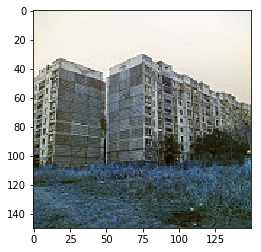

In [6]:
plt.imshow(img)

In [7]:

temp = []
for img_name in train.image_name:
    img_path = os.path.join(file_path, 'train', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (28, 28))
   
   # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

In [8]:
train_x.shape

(17034, 28, 28, 3)

In [9]:

for img_name in test.image_name:
    img_path = os.path.join('C:\\Users\\NanduCn\\jupter1\\train-scene classification', 'train', img_name)
    imag =cv2.imread(img_path)
    

In [10]:
temp = []
imag = cv2.resize(imag, (28, 28))
temp.append(img)
test_x = np.stack(temp)

In [11]:
test_x

array([[[[217, 207, 219],
         [214, 205, 216],
         [217, 204, 216],
         ...,
         [146, 138, 138],
         [131, 125, 127],
         [103,  95,  96]],

        [[205, 200, 209],
         [211, 204, 209],
         [211, 203, 214],
         ...,
         [119, 114, 119],
         [ 90,  88,  86],
         [ 86,  80,  80]],

        [[210, 201, 211],
         [214, 204, 212],
         [219, 205, 213],
         ...,
         [ 92,  81,  84],
         [ 90,  79,  82],
         [ 93,  80,  83]],

        ...,

        [[114, 115, 125],
         [ 75,  71,  83],
         [ 79,  72,  79],
         ...,
         [ 12,  11,  16],
         [ 12,  19,  22],
         [  5,  10,   8]],

        [[137, 138, 150],
         [178, 182, 189],
         [147, 161, 171],
         ...,
         [ 24,  24,  28],
         [ 14,  22,  21],
         [  5,   7,   9]],

        [[ 34,  49,  53],
         [ 33,  44,  49],
         [ 15,  24,  25],
         ...,
         [  1,   1,   1],
        

In [12]:
images1 = np.array(train_x)

In [13]:
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

In [14]:
input_img =Input(shape=(28,28,3))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [15]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

In [16]:
autoencoder.fit(images1,images1,epochs=10,batch_size=64)

Epoch 1/10
17034/17034 [==============================] - 26s 2ms/step - loss: 17545.3065
Epoch 2/10
17034/17034 [==============================] - 27s 2ms/step - loss: 17539.7239: 0s - loss: 17540.575
Epoch 3/10
17034/17034 [==============================] - 27s 2ms/step - loss: 17539.7237: 0s - loss: 17538.756
Epoch 4/10
17034/17034 [==============================] - 27s 2ms/step - loss: 17539.7237
Epoch 5/10
17034/17034 [==============================] - 28s 2ms/step - loss: 17539.7236
Epoch 6/10
17034/17034 [==============================] - 28s 2ms/step - loss: 17539.7237
Epoch 7/10
17034/17034 [==============================] - 28s 2ms/step - loss: 17539.7237
Epoch 8/10
17034/17034 [==============================] - 27s 2ms/step - loss: 17539.7236
Epoch 9/10
17034/17034 [==============================] - 28s 2ms/step - loss: 17539.7237
Epoch 10/10
17034/17034 [==============================] - 28s 2ms/step - loss: 17539.7237


In [17]:
encode_images= encoder.predict(images1).reshape(17034,128)